In [165]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv("dorothea_train.data", header = None)

#split our data based on space

df.columns = ['here']
df = df.here.str.split(" ", expand = True)

#replace NaN values with 0 and change data from type: object to type: int/float
df = df.replace(np.nan, 0)
df = df.apply(pd.to_numeric)
df = np.nan_to_num(df)

In [175]:
#relabel the training sets classification
results = pd.read_csv("dorothea_train.labels", header = None)
results.columns = ['Result']
results['Result'].replace(-1, 'Inactive', inplace = True)
results['Result'].replace(1, 'Active', inplace = True)

results.Result.value_counts()

Inactive    722
Active       78
Name: Result, dtype: int64

In [77]:
#standardize the feature vectors

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df)

In [188]:
#use PCA for dimension reduction of the feature vectors

from sklearn.decomposition import PCA

#we can put in the number of components we want returned

pca_Dorothea = PCA(n_components = 2) #assign 2 components to the PCA

principalComponents_Dorothea = pca_Dorothea.fit_transform(x)

principal_dorothea_df = pd.DataFrame(data = principalComponents_Dorothea, columns = ['PC1', 'PC2'])
principal_dorothea_df.loc[:, 'Results'] = results.Result
principal_dorothea_df.Results.value_counts()

Inactive    722
Active       78
Name: Results, dtype: int64

In [82]:
#check how much of the variance is covered by 2 components
pca_Dorothea.explained_variance_ratio_

array([0.42809159, 0.19342887])

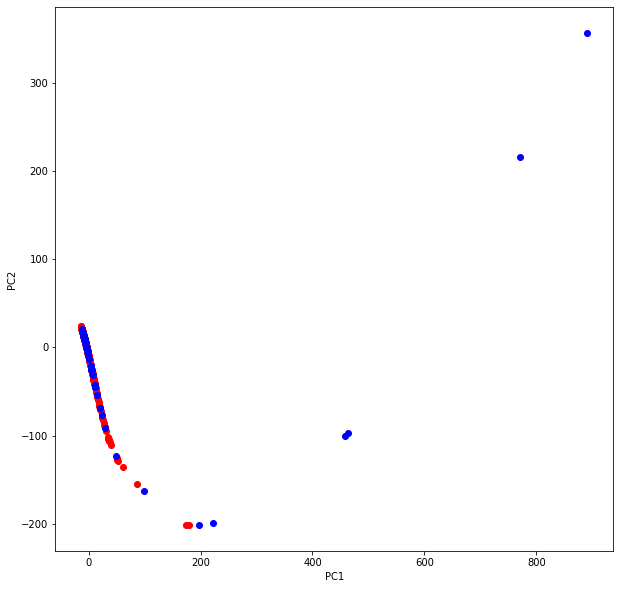

In [199]:
plt.figure(figsize = (10, 10))

plt.xlabel('PC1')
plt.ylabel('PC2')

#plot Inactive results with PC1 and PC2
plt.scatter(principal_dorothea_df.loc[principal_dorothea_df.Results == 'Inactive', 'PC1'], 
            principal_dorothea_df.loc[principal_dorothea_df.Results == 'Inactive', 'PC2'], 
            c = 'r')

#plot active results with PC1 and PC2
plt.scatter(principal_dorothea_df.loc[principal_dorothea_df.Results == 'Active', 'PC1'], 
            principal_dorothea_df.loc[principal_dorothea_df.Results == 'Active', 'PC2'], 
            c = 'b')


In [158]:
#calculate all 800 PCA and how much they cover
pca = PCA().fit(x)
evr = pca.explained_variance_ratio_ #find the variance of all the 30 feature vectors
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.4281
 1: 0.1934
 2: 0.1173
 3: 0.0667
 4: 0.0428
 5: 0.0367
 6: 0.0209
 7: 0.0146
 8: 0.0105
 9: 0.0085
10: 0.0071
11: 0.0063
12: 0.0045
13: 0.0039
14: 0.0033
15: 0.0027
16: 0.0024
17: 0.0021
18: 0.0018
19: 0.0018
20: 0.0016
21: 0.0014
22: 0.0013
23: 0.0012
24: 0.0010
25: 0.0009
26: 0.0009
27: 0.0009
28: 0.0008
29: 0.0007
30: 0.0007
31: 0.0006
32: 0.0006
33: 0.0005
34: 0.0005
35: 0.0004
36: 0.0004
37: 0.0004
38: 0.0004
39: 0.0004
40: 0.0003
41: 0.0003
42: 0.0003
43: 0.0003
44: 0.0002
45: 0.0002
46: 0.0002
47: 0.0002
48: 0.0002
49: 0.0002
50: 0.0002
51: 0.0002
52: 0.0002
53: 0.0002
54: 0.0002
55: 0.0002
56: 0.0001
57: 0.0001
58: 0.0001
59: 0.0001
60: 0.0001
61: 0.0001
62: 0.0001
63: 0.0001
64: 0.0001
65: 0.0001
66: 0.0001
67: 0.0001
68: 0.0001
69: 0.0001
70: 0.0001
71: 0.0001
72: 0.0001
73: 0.0001
74: 0.0001
75: 0.0001
76: 0.0001
77: 0.0001
78: 0.0001
79: 0.0001
80: 0.0001
81: 0.0001
82: 0.0001
83: 0.0001
84: 0.0001
85: 0.0001
86: 0.0000
87: 0.0000
88: 0.0000
89: 0.0000
90: 0.0000

Text(0.5, 0, 'Number of components')

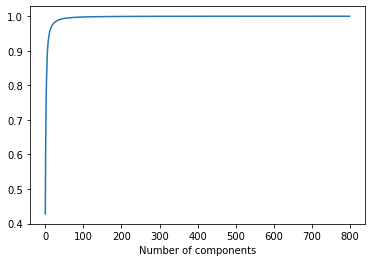

In [159]:
#plot all 800 PCA

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')